For this question I am going to use a decision tree method to identify orbital class, orbital type and then whether both values correspond to the respective columns in the dataset.
To do this I have to first import any relevant libraries and the dataset I'm going to be using. Pandas is being used to read and draw data from the dataset, scikit-learn is for the coding of the decision tree, numpy is for miscellaneous mathematical code, and matplotlib is to visualise the decision tree for better comprehension of the code's function.

To begin I imported the csv file containing my dataset and assigned it a variable name.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np


file_path = 'Satellite_Data.csv'
satellite_data = pd.read_csv(file_path)

After this, I chose the columns that I would be using for the classifcation: Class of Orbit, Type of Orbit, Perigee, Apogee, Inclination.

I then saved a new variable with the data of the columns I'm interested in, excluding any extra information.

In [ ]:
# Selecting relevant columns and handling missing values
satellite_data = load_data()
columns_required = ["Class of Orbit", "Type of Orbit", "Perigee (Kilometers)", "Apogee (Kilometers)", "Inclination (Degrees)"]
processed_data = satellite_data[columns_required].copy()

Normalisation of the data below. I then processed my data further, any blank values for Class or Type I filled in with "Unknown", and blank values for altitude would be treated as 0, whilst empty values for Inclination remain blank.

In [ ]:
# Acquires the relevant column and ".fillna" alters positions with no data.
# For the orbital Class and Type as they contain strings, it replaces blank values with "Unknown".
processed_data["Class of Orbit"] = processed_data["Class of Orbit"].fillna("Unknown")
processed_data["Type of Orbit"] = processed_data["Type of Orbit"].fillna("Unknown")

# For Perigee and Apogee the blank values are replaced with 0, as they contain integers.
processed_data["Perigee (Kilometers)"] = processed_data["Perigee (Kilometers)"].fillna(0)
processed_data["Apogee (Kilometers)"] = processed_data["Apogee (Kilometers)"].fillna(0)

The function checks if either apogee or perigee is 0, if it is then the altitude is set at the non-zero value. Otherwise it calculates the mean of the data. It then applies this data to the copied dataset as a new column.

In [ ]:
def calculate_altitude(row):
    if row["Perigee (Kilometers)"] == 0: # If perigee is zero use apogee.
        return row["Apogee (Kilometers)"]
    elif row["Apogee (Kilometers)"] == 0: # If apogee is zero use perigee.
        return row["Perigee (Kilometers)"]
    return (row["Perigee (Kilometers)"] + row["Apogee (Kilometers)"]) / 2 # When both apogee an perigee present, find the mean.

processed_data["Altitude (Kilometers)"] = processed_data.apply(calculate_altitude, axis=1) # Assigns data to new dataset

Below establishes the features to use, and the target for the decision tree.

In [ ]:
X = processed_data[["Altitude (Kilometers)", "Inclination (Degrees)"]] # Features
y_class = processed_data["Class of Orbit"] # Target for first decision tree
y_type = processed_data["Type of Orbit"] # Target for 2nd decision tree

Splitting the data into a training and test set. With a a defined random_state so my results were reproducible. The variables are split into training and testing for each tree. Used a standard 80/20 split

In [ ]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train_class, y_test_class, y_train_type, y_test_type = train_test_split(
    X, y_class, y_type, test_size=0.2, random_state=42 # Random state makes sure the data is split the same way to be able to reproduce.
)

Below is the code for the decision tree, it uses a depth of 3 as anything more divides the dataset into too small segments.

In [ ]:
# Decision tree for "Class of Orbit" with max depth of 3
dt_class_orbit = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_class_orbit.fit(X_train, y_train_class)

# Decision tree for "Type of Orbit" with max depth of 3
dt_type_orbit = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_type_orbit.fit(X_train, y_train_type)

Variable.predict() uses the decision tree trained before to make predictions on the data given, which is then assigned to a new variable.

In [ ]:
# Predicting for the entire dataset
y_pred_class_full = dt_class_orbit.predict(X)
y_pred_type_full = dt_type_orbit.predict(X)

Afterwards the predicted data is assigned back into the processed dataset for easy comparsion to the original classifications. A new boolean column is created that compares whether the predicted data matches the original data for each classified column, and only when both are the same does it display a "True" value in the Prediction Correct column. Afterwards the mean is calculated of this column, given its a boolean, the mean is a proportion rather - and therefore a percentage when multiplied by 100.

In [ ]:
# Adding predictions to the processed dataset
processed_data["Predicted Class of Orbit"] = y_pred_class_full
processed_data["Predicted Type of Orbit"] = y_pred_type_full

# Checking if both predictions match the original values
processed_data["Prediction Correct"] = (processed_data["Class of Orbit"] == processed_data["Predicted Class of Orbit"]) & \
                                       (processed_data["Type of Orbit"] == processed_data["Predicted Type of Orbit"])


accuracy_combined = np.mean(processed_data["Prediction Correct"]) * 100 # Calculating combined accuracy

The decision tree is plotted for additional clarity, the main function to plot each tree.

In [ ]:
# Decision tree plot
def plot_tree_orbits(decision_tree, feature_names, class_names, title, figsize, fontsize=8):
    plt.figure(figsize=figsize)
    plot_tree(
        decision_tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        fontsize=fontsize,
        rounded=True,
    )
    plt.title(title, fontsize=fontsize + 2)
    plt.show()

The individual functions for each decision tree, Class and Type.

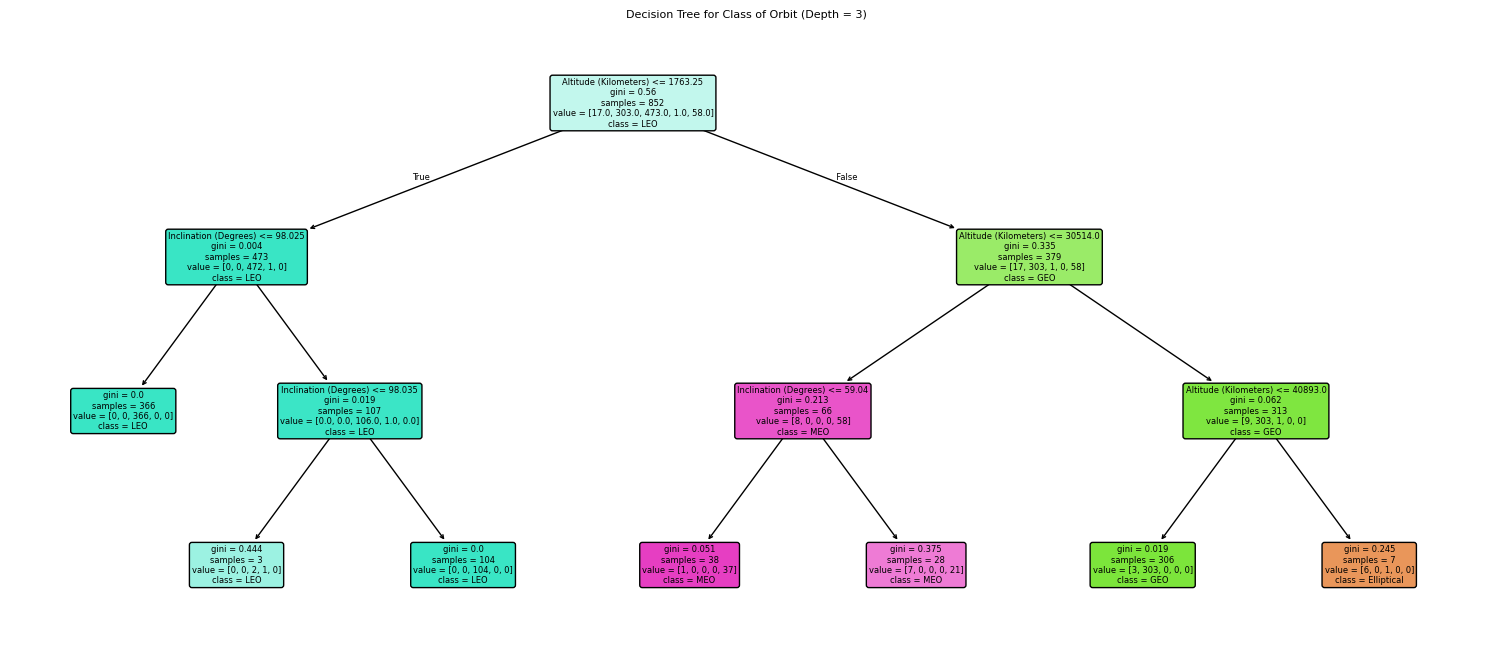

In [ ]:
# Plotting Class of Orbit tree
plot_tree_orbits(
    dt_class_orbit,
    feature_names=["Altitude (Kilometers)", "Inclination (Degrees)"],
    class_names=dt_class_orbit.classes_,
    title="Decision Tree for Class of Orbit (Depth = 3)",
    figsize=(19, 8),
    fontsize=6
)

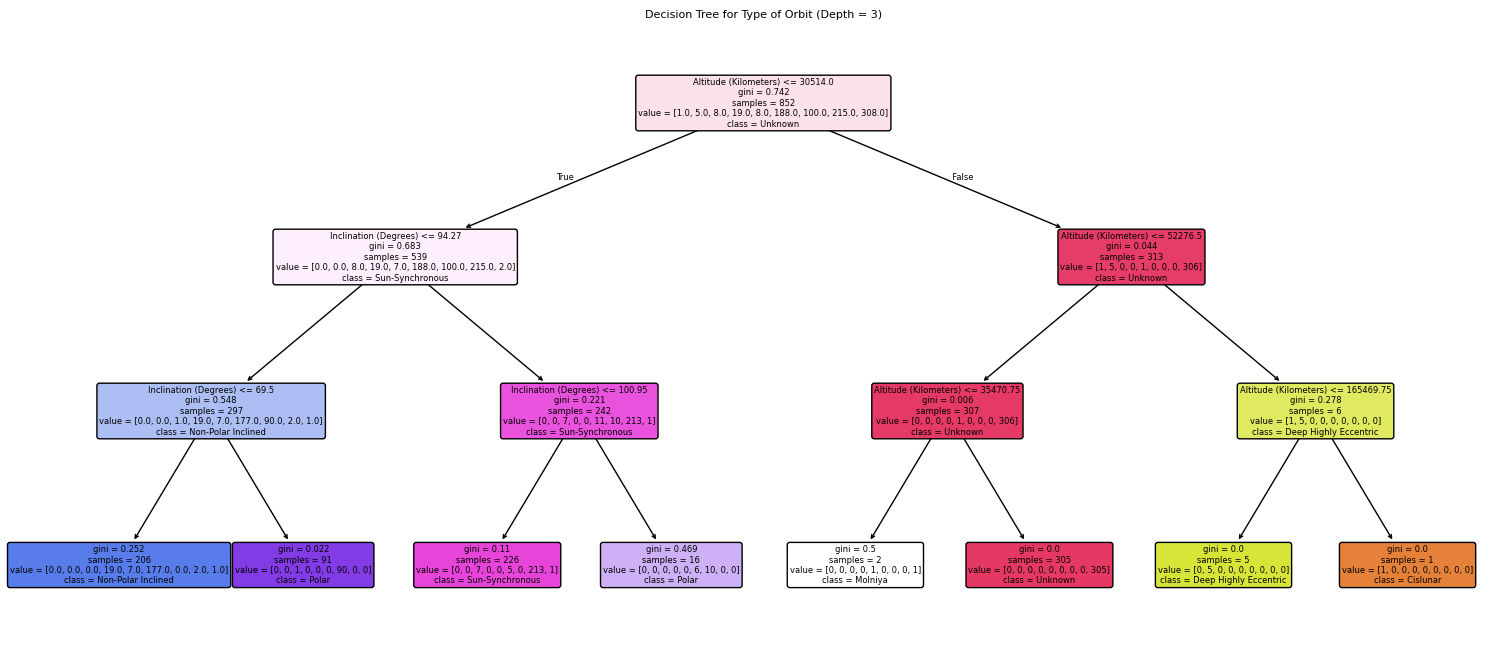

In [ ]:
# Plotting Type of Orbit tree
plot_tree_orbits(
    dt_type_orbit,
    feature_names=["Altitude (Kilometers)", "Inclination (Degrees)"],
    class_names=dt_type_orbit.classes_,
    title="Decision Tree for Type of Orbit (Depth = 3)",
    figsize=(19, 8),
    fontsize=6
)

In [ ]:
# Displaying combined accuracy
print(f"Combined Accuracy (Class and Type match): {accuracy_combined:.2f}%")

Combined Accuracy (Class and Type match): 93.66%
